In [14]:
import os, json


path = "../data/cuts/"
cuts = [(vid+'/'+cut) for vid in os.listdir(path) for cut in os.listdir(path + vid) if cut.endswith("_signer.json")]

scores = []
for idx, cut in enumerate(cuts):
    with open(path + cut) as datafile:
        line = ""
        while ']' not in line:
            line += datafile.readline()
        line = line[:-2] + '}'
        signer_data = json.loads(line)
    scores.append(signer_data["scores"])

count    13975.000000
mean         2.567728
std          2.574434
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         29.000000
dtype: float64

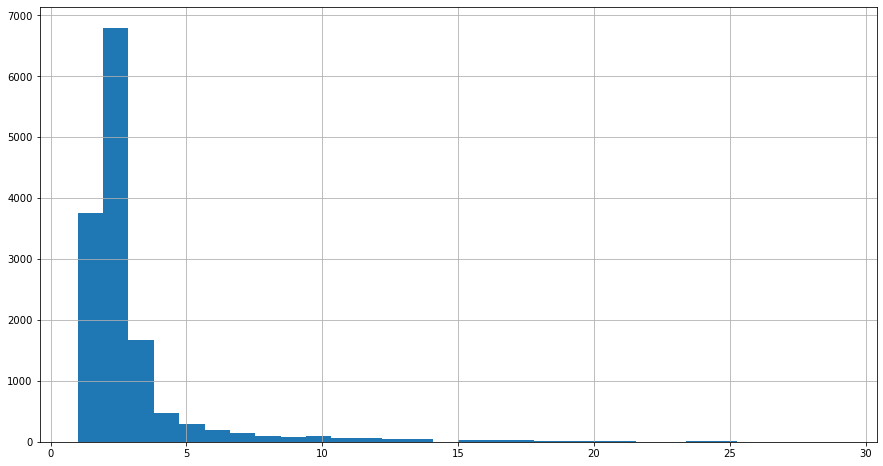

In [15]:
import pandas as pd

signers_s = pd.Series(map(len, scores))
display(signers_s.describe())
signers_fig = signers_s.hist(bins=30,figsize=(15,8))
signers_fig.get_figure().savefig("../data/graphs/signers/signers_hist.png")


count    10223.000000
mean         0.862727
std          0.255989
min          0.000000
25%          0.893268
50%          0.989834
75%          1.000000
max          1.000000
dtype: float64

<AxesSubplot:>

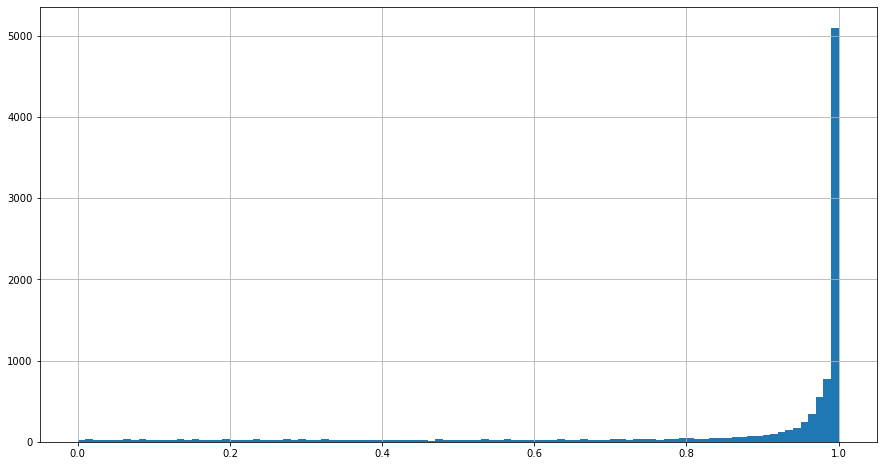

In [16]:
import pandas as pd
from IPython.display import display


def get_score(scores: list[float]):
    m1 = max(scores)
    scores = scores.copy()
    scores.remove(m1)
    return 0 if m1 == 0 else (m1 - max(scores)) / m1

scores_s = pd.Series(map(get_score, filter(lambda s: len(s) >= 2, scores)))
display(scores_s.describe())
scores_fig = scores_s.hist(bins=100,figsize=(15,8))
display(scores_fig)
scores_fig.get_figure().savefig("../data/graphs/signers/scores.png")

count    6798.000000
mean        0.851044
std         0.267747
min         0.000000
25%         0.869022
50%         0.989018
75%         1.000000
max         1.000000
dtype: float64

<AxesSubplot:>

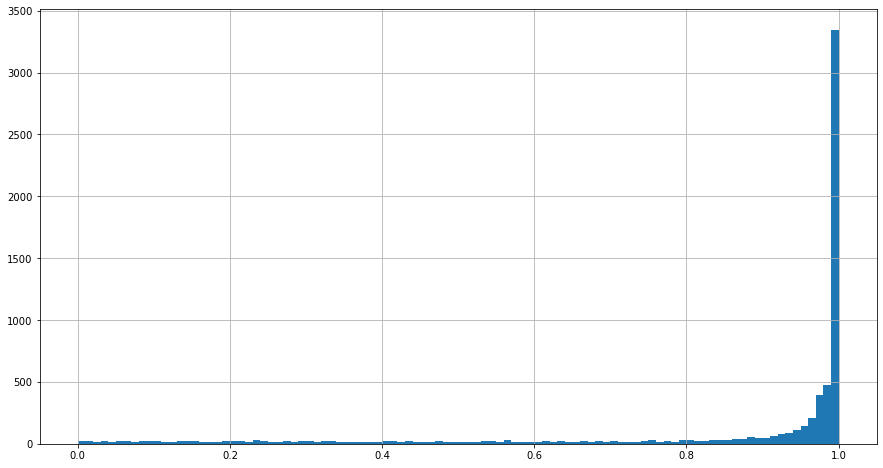

In [17]:
scores_2_s = pd.Series(map(get_score, filter(lambda s: len(s) == 2, scores)))
display(scores_2_s.describe())
scores_2_fig = scores_2_s.hist(bins=100,figsize=(15,8))
display(scores_2_fig)
scores_2_fig.get_figure().savefig("../data/graphs/signers/scores2.png")

count    3425.000000
mean        0.885914
std         0.229163
min         0.001587
25%         0.927280
50%         0.990639
75%         0.999331
max         1.000000
dtype: float64

<AxesSubplot:>

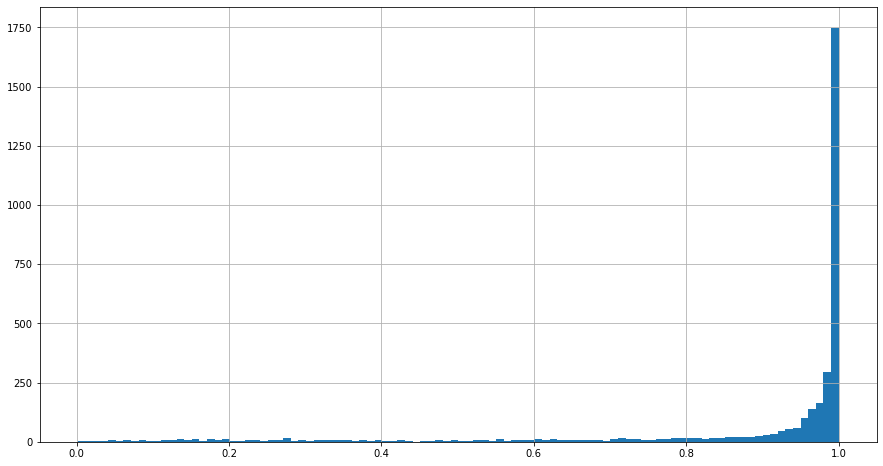

In [18]:
scores_gt2_s = pd.Series(map(get_score, filter(lambda s: len(s) > 2, scores)))
display(scores_gt2_s.describe())
scores_gt2_fig = scores_gt2_s.hist(bins=100,figsize=(15,8))
display(scores_gt2_fig)
scores_gt2_fig.get_figure().savefig("../data/graphs/signers/scores_gt2.png")